In [1]:
import json

with open("san_francisco_censustracts.json") as jsondata:
    d = json.load(jsondata)
    for feature in d["features"]:
        if feature["properties"]["DISPLAY_NAME"] == "100 Campus Drive, Stanford":
            stanford_nodes = feature["geometry"]["coordinates"]
        if feature["properties"]["DISPLAY_NAME"] == "700 Meder Street, Santa Cruz":
            ucsc_nodes = feature["geometry"]["coordinates"]

In [2]:
print(stanford_nodes)

[[[[-122.191325, 37.425302], [-122.18961, 37.427137], [-122.189803, 37.428187], [-122.189879, 37.42883], [-122.182288, 37.434498], [-122.17811, 37.43344], [-122.17812, 37.43172], [-122.17497, 37.4308], [-122.172679, 37.436281], [-122.17244, 37.43675], [-122.17054, 37.4409], [-122.17043, 37.44111], [-122.17018, 37.4414], [-122.16941, 37.44203], [-122.168872, 37.442504], [-122.16763, 37.44363], [-122.165424, 37.441929], [-122.165712, 37.44125], [-122.16893, 37.43145], [-122.17032, 37.429086], [-122.171583, 37.429351], [-122.17373, 37.42636], [-122.17305, 37.42519], [-122.17315, 37.42275], [-122.16905, 37.42252], [-122.16836, 37.4214], [-122.17074, 37.41952], [-122.17287, 37.41908], [-122.17533, 37.41937], [-122.17687, 37.42033], [-122.17722, 37.42046], [-122.17732, 37.42051], [-122.18224, 37.42192], [-122.18501, 37.42203], [-122.19084, 37.424365], [-122.191325, 37.425302]]]]


In [3]:
from scipy.spatial import Delaunay
import numpy as np

In [4]:
stanford_nodes = stanford_nodes[0][0]
ucsc_nodes = ucsc_nodes[0][0]

nodes = []
for node in stanford_nodes:
    nodes.append(node)
for node in ucsc_nodes:
    nodes.append(node)
points = np.array(nodes)

In [5]:
print(points)

[[-122.191325   37.425302]
 [-122.18961    37.427137]
 [-122.189803   37.428187]
 [-122.189879   37.42883 ]
 [-122.182288   37.434498]
 [-122.17811    37.43344 ]
 [-122.17812    37.43172 ]
 [-122.17497    37.4308  ]
 [-122.172679   37.436281]
 [-122.17244    37.43675 ]
 [-122.17054    37.4409  ]
 [-122.17043    37.44111 ]
 [-122.17018    37.4414  ]
 [-122.16941    37.44203 ]
 [-122.168872   37.442504]
 [-122.16763    37.44363 ]
 [-122.165424   37.441929]
 [-122.165712   37.44125 ]
 [-122.16893    37.43145 ]
 [-122.17032    37.429086]
 [-122.171583   37.429351]
 [-122.17373    37.42636 ]
 [-122.17305    37.42519 ]
 [-122.17315    37.42275 ]
 [-122.16905    37.42252 ]
 [-122.16836    37.4214  ]
 [-122.17074    37.41952 ]
 [-122.17287    37.41908 ]
 [-122.17533    37.41937 ]
 [-122.17687    37.42033 ]
 [-122.17722    37.42046 ]
 [-122.17732    37.42051 ]
 [-122.18224    37.42192 ]
 [-122.18501    37.42203 ]
 [-122.19084    37.424365]
 [-122.191325   37.425302]
 [-122.084299   36.962692]
 

In [6]:
tri = Delaunay(points)

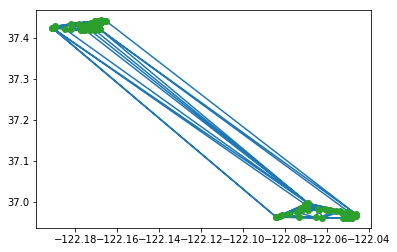

In [7]:
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [8]:
edges = set() 
for n in range(tri.nsimplex): 
    edge = sorted([tri.vertices[n,0], tri.vertices[n,1]]) 
    edges.add((edge[0], edge[1])) 
    edge = sorted([tri.vertices[n,0], tri.vertices[n,2]]) 
    edges.add((edge[0], edge[1])) 
    edge = sorted([tri.vertices[n,1], tri.vertices[n,2]]) 
    edges.add((edge[0], edge[1])) 
print(edges)

set([(26, 47), (1, 34), (47, 54), (50, 52), (54, 55), (62, 64), (10, 17), (39, 70), (43, 50), (60, 63), (40, 41), (13, 17), (14, 17), (18, 19), (17, 25), (23, 26), (34, 46), (5, 8), (56, 57), (6, 7), (46, 48), (44, 45), (51, 52), (47, 53), (45, 48), (25, 26), (49, 53), (37, 70), (21, 31), (12, 17), (4, 5), (16, 25), (63, 67), (27, 28), (34, 36), (25, 60), (0, 1), (29, 30), (58, 67), (56, 58), (19, 24), (44, 50), (57, 59), (14, 15), (28, 32), (55, 56), (7, 8), (33, 34), (18, 25), (23, 28), (4, 15), (61, 63), (51, 68), (53, 54), (8, 18), (27, 47), (1, 6), (51, 53), (15, 16), (7, 21), (22, 23), (30, 32), (69, 70), (36, 46), (8, 9), (40, 51), (4, 12), (43, 46), (0, 36), (41, 50), (40, 70), (1, 33), (57, 60), (47, 49), (65, 66), (44, 52), (58, 59), (20, 21), (6, 32), (60, 61), (41, 43), (34, 47), (4, 9), (43, 45), (16, 17), (37, 71), (7, 18), (28, 47), (50, 51), (63, 66), (66, 71), (23, 24), (4, 11), (38, 39), (4, 6), (17, 18), (5, 7), (24, 25), (52, 53), (28, 33), (66, 67), (67, 71), (0, 2

In [9]:
import networkx as nx 
graph = nx.Graph(list(edges)) 
# print(graph.edges()) 

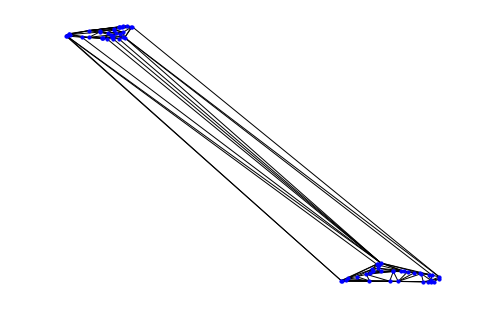

In [10]:
import matplotlib.pyplot as plt 
pointIDXY = dict(zip(range(len(points)), points)) 
nx.draw(graph, pointIDXY,node_size = 10, node_color = "blue") 
plt.show() 

In [11]:
print(len(edges))

198


In [12]:
# Q12
# • Each degree of latitude and longitude ≈ 69 miles
# • Carlength≈5m=0.003mile
# • Cars maintain a safety distance of 2 seconds to the next car
# • Each road has 2 lanes in each direction
# Multi-lane highway driving	110 kph	66 mph
speed = 66
for i in range(len(edges)):
    edge = list(edges)[i]
    start = points[edge[0]]
    end = points[edge[1]]
    road_len = np.sqrt(np.power(end[1] - end[0], 2) + np.power(start[1] - start[0], 2)) * 69.0
    traffic_flow = (road_len / (0.003 + (60 * 2)/3600.0))
    print("For road: ", i, " the traffic flow is: ", traffic_flow)
    

('For road: ', 0, ' the traffic flow is: ', 427908.00295045361)
('For road: ', 1, ' the traffic flow is: ', 428681.95553103788)
('For road: ', 2, ' the traffic flow is: ', 427169.33630000125)
('For road: ', 3, ' the traffic flow is: ', 427154.57308933232)
('For road: ', 4, ' the traffic flow is: ', 427132.84838174947)
('For road: ', 5, ' the traffic flow is: ', 427056.58366825449)
('For road: ', 6, ' the traffic flow is: ', 428663.75989431317)
('For road: ', 7, ' the traffic flow is: ', 427140.22770623327)
('For road: ', 8, ' the traffic flow is: ', 427169.50571028254)
('For road: ', 9, ' the traffic flow is: ', 427074.48140221916)
('For road: ', 10, ' the traffic flow is: ', 427160.64679097896)
('For road: ', 11, ' the traffic flow is: ', 428663.75989431317)
('For road: ', 12, ' the traffic flow is: ', 428663.6739504498)
('For road: ', 13, ' the traffic flow is: ', 428638.76128104341)
('For road: ', 14, ' the traffic flow is: ', 428634.64739633538)
('For road: ', 15, ' the traffic flo

In [13]:
# dummy codes
bb = nx.edge_betweenness_centrality(graph, normalized=False)
nx.set_edge_attributes(graph, bb, 'capacity')
nx.set_edge_attributes(graph, bb, 'weight')

#### Q13 Calculate the Max Flow & Calculate the Number of Edge-Disjoint Paths

In [14]:
stanford_id = 0
UCSC_id = 71
print(nx.maximum_flow_value(graph, stanford_id, UCSC_id))

from networkx.algorithms.connectivity.disjoint_paths import edge_disjoint_paths
print(len(list(edge_disjoint_paths(graph, stanford_id, UCSC_id))))

309.517917877
5


#### Q14 Defoliate the Graph

In [23]:
threshold = 20
ebunch = []
for (u,v) in graph.edges():
    if graph[u][v]['weight'] < threshold:
        ebunch.append((u,v))
        
graph.remove_edges_from(ebunch)
# graph.__dict__
# plot on real map coordinates and check bridges location

{'_adj': {0: {1: {'capacity': 53.369071697237196,
    'weight': 53.369071697237196},
   2: {'capacity': 42.45247326203208, 'weight': 42.45247326203208},
   3: {'capacity': 57.198451990905575, 'weight': 57.198451990905575},
   34: {'capacity': 48.48180467193623, 'weight': 48.48180467193623},
   36: {'capacity': 117.68658409110411, 'weight': 117.68658409110411}},
  1: {0: {'capacity': 53.369071697237196, 'weight': 53.369071697237196},
   2: {'capacity': 25.438731443994595, 'weight': 25.438731443994595},
   4: {'capacity': 129.77415410956425, 'weight': 129.77415410956425},
   6: {'capacity': 66.2303497279963, 'weight': 66.2303497279963},
   32: {'capacity': 52.552398095678335, 'weight': 52.552398095678335},
   33: {'capacity': 48.237524828972205, 'weight': 48.237524828972205},
   34: {'capacity': 143.17078113872822, 'weight': 143.17078113872822}},
  2: {0: {'capacity': 42.45247326203208, 'weight': 42.45247326203208},
   1: {'capacity': 25.438731443994595, 'weight': 25.438731443994595},
  

#### Q15: triangle inequality